<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
#| echo: false
Image(url = 'https://i.ibb.co/6bHMXK7/logo.png')

`istatapi` is a Python interface to discover and retrieve data from ISTAT API (The Italian National Institute of Statistics). The library is designed to explore ISTAT metadata and to retreive data in different formats. `istatapi` is built on top of [ISTAT SDMX RESTful API](https://developers.italia.it/it/api/istat-sdmx-rest).

Whether you are an existing organization, a curious individual or an academic researcher, `istatapi` aims to allow you to easily access ISTAT databases with just a few lines of code. The library implements functions to:

* Explore all available ISTAT datasets (dataflows in SDMX terminology)
* Search available datasets by keywords
* Retrieve information on a specific dataset like: the ID of the dataflow, the names and available values of the dimensions of the dataset, available filters.
* Get data of an available dataset in a pandas DataFrame, csv or json format.

## Install

You can easily install the library by using the pip command:

`pip install istatapi`

## Tutorial

First, let's simply import the modules we need:

In [ ]:
from istatapi import discovery, retrieval
import matplotlib.pyplot as plt

With `istatapi` we can search through all the available datasets by simply using the following function:

In [ ]:
#| output: false
discovery.all_available()

,df_id,version,df_description,df_structure_id
0,101_1015,1.3,Crops,DCSP_COLTIVAZIONI
1,101_1030,1.0,"PDO, PGI and TSG quality products",DCSP_DOPIGP
2,101_1033,1.0,slaughtering,DCSP_MACELLAZIONI
3,101_1039,1.2,Agritourism - municipalities,DCSP_AGRITURISMO_COM
4,101_1077,1.0,"PDO, PGI and TSG products: operators - munici...",DCSP_DOPIGP_COM
...,...,...,...,...
504,97_953,1.1,Environmental protection expenditure,DCCN_SPESAPROTAMB
505,98_1066,1.0,Productivity measures - Accounts in the 2014 v...,DCCN_PRODUTTIVITA_B14
506,98_1067,1.0,Productivity measures - Accounts in the 2011 v...,DCCN_PRODUTTIVITA_B11
507,98_197,1.3,Productivity measures,DCCN_PRODUTTIVITA


In [ ]:
#| echo: false
display(HTML(discovery.all_available().head().to_html()))

,df_id,version,df_description,df_structure_id
0,101_1015,1.3,Crops,DCSP_COLTIVAZIONI
1,101_1030,1.0,"PDO, PGI and TSG quality products",DCSP_DOPIGP
2,101_1033,1.0,slaughtering,DCSP_MACELLAZIONI
3,101_1039,1.2,Agritourism - municipalities,DCSP_AGRITURISMO_COM
4,101_1077,1.0,"PDO, PGI and TSG products: operators - municipalities data",DCSP_DOPIGP_COM


You can also search for a specific dataset (in this example, a dataset on imports), by doing:

In [ ]:
#| output: false
discovery.search_dataset("import")

,df_id,version,df_description,df_structure_id
10,101_962,1.0,Livestock import export,DCSP_LIVESTIMPEXP
47,139_176,1.0,Import and export by country and commodity Nac...,DCSP_COEIMPEX1
49,143_222,1.0,Import price index - monthly data,DCSC_PREIMPIND


In [ ]:
#| echo: false
display(HTML(discovery.search_dataset("import").to_html()))

,df_id,version,df_description,df_structure_id
10,101_962,1.0,Livestock import export,DCSP_LIVESTIMPEXP
47,139_176,1.0,Import and export by country and commodity Nace 2007,DCSP_COEIMPEX1
49,143_222,1.0,Import price index - monthly data,DCSC_PREIMPIND


To retrieve data from a specific dataset, we first need to create an instance of the [`DataSet`](https://Attol8.github.io/istatapi/discovery.html#dataset) class. We can use `df_id`, `df_description` or `df_structure_id` from the above DataFrame to tell to the [`DataSet`](https://Attol8.github.io/istatapi/discovery.html#dataset) class what dataset we want to retrieve. Here, we are going to use the `df_id` value. This may take a few seconds to load.

In [ ]:
# initialize the dataset and get its dimensions
ds = discovery.DataSet(dataflow_identifier="139_176")

We now want to see what variables are included in the dataset that we are analysing. With `istatapi` we can easily print its variables ("dimensions" in ISTAT terminology) and their description.

In [ ]:
#| output: false
ds.dimensions_info()

,dimension,dimension_ID,description
0,FREQ,CL_FREQ,Frequency
1,MERCE_ATECO_2007,CL_ATECO_2007_MERCE,Commodity Nace 2007
2,PAESE_PARTNER,CL_ISO,Geopolitics
3,ITTER107,CL_ITTER107,Territory
4,TIPO_DATO,CL_TIPO_DATO12,Data type 12


In [ ]:
#| echo: false
display(HTML(ds.dimensions_info().to_html()))

,dimension,dimension_ID,description
0,FREQ,CL_FREQ,Frequency
1,MERCE_ATECO_2007,CL_ATECO_2007_MERCE,Commodity Nace 2007
2,PAESE_PARTNER,CL_ISO,Geopolitics
3,ITTER107,CL_ITTER107,Territory
4,TIPO_DATO,CL_TIPO_DATO12,Data type 12


Now, each dimension can have a few possible values. `istatapi` provides a quick method to analyze these values and print their English descriptions. 

In [ ]:
#| output: false
dimension = "TIPO_DATO" #use "dimension" column from above
ds.get_dimension_values(dimension)

,values_ids,values_description
0,EV,export - value (euro)
1,TBV,trade balance - value (euro)
2,ISAV,import - seasonally adjusted value - world bas...
3,ESAV,export - seasonally adjusted value - world bas...
4,TBSAV,trade balance - seasonally adjusted value -wo...
5,IV,import - value (euro)


In [ ]:
#| echo: false
display(HTML(ds.get_dimension_values(dimension).to_html()))

,values_ids,values_description
0,EV,export - value (euro)
1,TBV,trade balance - value (euro)
2,ISAV,import - seasonally adjusted value - world based model (millions of euro)
3,ESAV,export - seasonally adjusted value - world based model (millions of euro)
4,TBSAV,trade balance - seasonally adjusted value -world based model (millions of euro)
5,IV,import - value (euro)


If we do not filter any of our variables, the data will just include all the possible values in the dataset. This could result in too much data that would slow our code and make it difficult to analyze. Thus, we need to filter our dataset. To do so, we can simply use the `values_ids` that we found using the function `get_dimension_values` in the cell above.

**Note**: Make sure to pass the names of the dimensions in lower case letters as arguments of the `set_filter` function. If you want to filter for multiple values, simply pass them as lists.

In [ ]:
freq = "M" #monthly frequency
tipo_dato = ["ISAV", "ESAV"] #imports and exports seasonally adjusted data
paese_partner = "WORLD" #trade with all countries

ds.set_filters(freq = freq, tipo_dato = tipo_dato, paese_partner = paese_partner)

Having set our filters, we can now finally retrieve the data by simply passing our [`DataSet`](https://Attol8.github.io/istatapi/discovery.html#dataset) instance to the function [`get_data`](https://Attol8.github.io/istatapi/retrieval.html#get_data). It will return a pandas DataFrame with all the data that we requested. The data will be already sorted by datetime

In [ ]:
#| output: false
trade_df = retrieval.get_data(ds)
trade_df.head()

,DATAFLOW,FREQ,MERCE_ATECO_2007,PAESE_PARTNER,ITTER107,TIPO_DATO,TIME_PERIOD,OBS_VALUE,BREAK,CONF_STATUS,OBS_PRE_BREAK,OBS_STATUS,BASE_PER,UNIT_MEAS,UNIT_MULT,METADATA_EN,METADATA_IT
0,IT1:139_176(1.0),M,10,WORLD,ITTOT,ESAV,1993-01-01,10767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,IT1:139_176(1.0),M,10,WORLD,ITTOT,ISAV,1993-01-01,9226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,IT1:139_176(1.0),M,10,WORLD,ITTOT,ISAV,1993-02-01,10015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:139_176(1.0),M,10,WORLD,ITTOT,ESAV,1993-02-01,10681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,IT1:139_176(1.0),M,10,WORLD,ITTOT,ISAV,1993-03-01,9954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#| echo: false
display(HTML(trade_df.head().to_html()))

,DATAFLOW,FREQ,MERCE_ATECO_2007,PAESE_PARTNER,ITTER107,TIPO_DATO,TIME_PERIOD,OBS_VALUE,BREAK,CONF_STATUS,OBS_PRE_BREAK,OBS_STATUS,BASE_PER,UNIT_MEAS,UNIT_MULT,METADATA_EN,METADATA_IT
0,IT1:139_176(1.0),M,10,WORLD,ITTOT,ESAV,1993-01-01,10767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,IT1:139_176(1.0),M,10,WORLD,ITTOT,ISAV,1993-01-01,9226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,IT1:139_176(1.0),M,10,WORLD,ITTOT,ISAV,1993-02-01,10015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IT1:139_176(1.0),M,10,WORLD,ITTOT,ESAV,1993-02-01,10681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,IT1:139_176(1.0),M,10,WORLD,ITTOT,ISAV,1993-03-01,9954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now that we have our data, we can do whatever we want with it. For example, we can plot the data after having it cleaned up a bit. You are free to make your own analysis!

<matplotlib.legend.Legend>

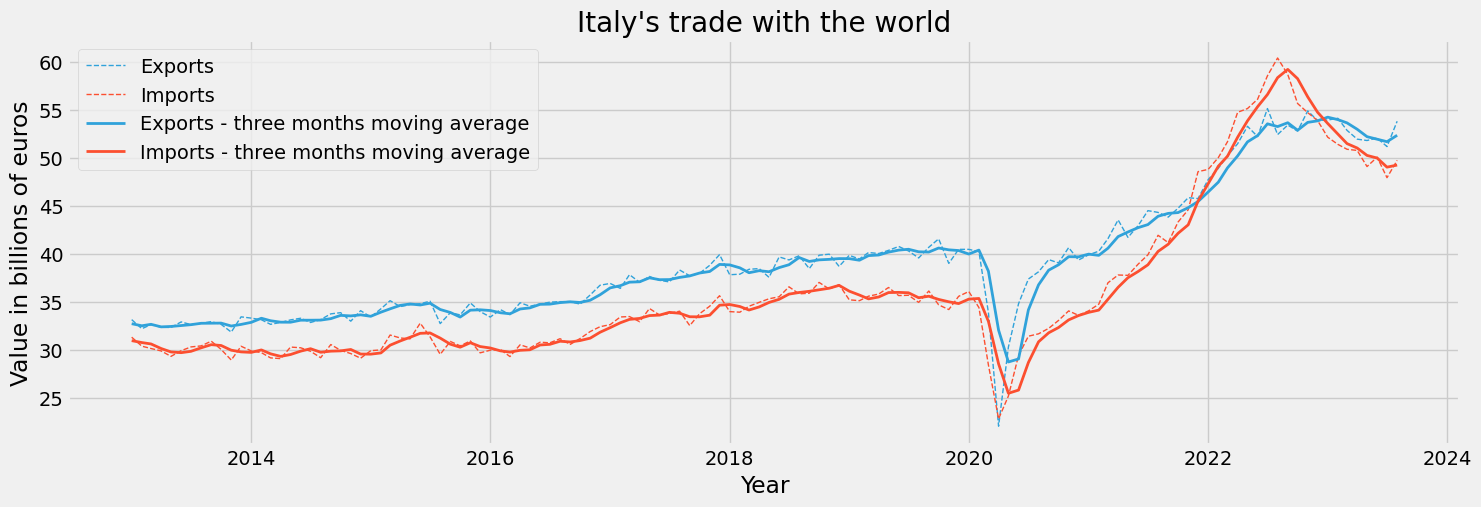

In [ ]:
# set matplotlib themes
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [16, 5]

#fiveThirtyEight palette
colors = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b']

# calculate moving averages for the plot
trade_df["MA_3"] = trade_df.groupby("TIPO_DATO")["OBS_VALUE"].transform(
    lambda x: x.rolling(window=3).mean()
)

#replace the "TIPO_DATO" column values with more meaningful labels
trade_df["TIPO_DATO"] = trade_df["TIPO_DATO"].replace(
    {"ISAV": "Imports", "ESAV": "Exports"}
)

# Plot the data
after_2013 = trade_df["TIME_PERIOD"] >= "2013"
is_ESAV = trade_df["TIPO_DATO"] == "Exports"
is_ISAV = trade_df["TIPO_DATO"] == "Imports"

exports = trade_df[is_ESAV & after_2013].rename(columns={"OBS_VALUE": "Exports", "MA_3": "Exports - three months moving average"})
imports = trade_df[is_ISAV & after_2013].rename(columns={"OBS_VALUE": "Imports", "MA_3": "Imports - three months moving average"})

plt.plot(
    "TIME_PERIOD",
    "Exports",
    data=exports,
    marker="",
    linestyle="dashed",
    color = colors[0],
    linewidth=1
)
plt.plot(
    "TIME_PERIOD",
    "Imports",
    data=imports,
    marker="",
    linestyle="dashed",
    color = colors[1],
    linewidth=1
)
plt.plot(
    "TIME_PERIOD",
    "Exports - three months moving average",
    data=exports,
    color = colors[0],
    linewidth=2
)
plt.plot(
    "TIME_PERIOD",
    "Imports - three months moving average",
    data=imports,
    marker="",
    color = colors[1],
    linewidth=2
)

# add a title
plt.title("Italy's trade with the world")

# add a label to the x axis
plt.xlabel("Year")

# turn y scale from millions to billions (divide by a 1000), and add a label
plt.ylabel("Value in billions of euros")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1000))))
plt.legend()

With just a few lines of code, we have been able to retrieve data from ISTAT and make a simple plot. This is just a simple example of what you can do with `istatapi`. You can find more examples in the `_examples` folder. Enjoy!